<a href="https://colab.research.google.com/github/moiyajosephs/Daat-622/blob/main/Homework_4/Data_622_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 - Final Project
#### Moiya Josephs

## Essay Introduction

Over the past 15 weeks we have discussed multiple models capable of classification and prediction. For the purposes of this assignment I will select the most interesting models I have learned in this course: Decision Trees, Logistic Regression and Neural Networks.

The dataset that I am applying these algorithms to is the [Customer Churn Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data?select=customer_churn_dataset-training-master.csv) from Kaggle. This dataset refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. Customer churn is an important metrics that all businesses, especially subscription based coompaies utilize. It allows them to make insights into possible business models they can use to retain customers. The problem I am trying to solve is determining the different factors that can predict the churn rate of a company. Based on the different demographic information, subscription type and customer service experience, this can help a business make decisions on how to keep their customers.
To analyze this dataset I looked at various exploratory statistics and correlation factors. I was trying to determine if there was one variable that greatly influenced if a customer churned. Additionally, I was trying to understand the shape of the data, if the output variable `churn` was imbalanced and other insightful information I could find that would help my models.


## Data Exploration

The dataset Customer Churn Dataset has 12 columns each variable contains desciptive, both quantitative and qualitative data of customers of an undisclosed business. The churn label represents if the customer churned (1) or not (0).  



In [6]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib and alias it as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Load the dataset
url = 'https://raw.githubusercontent.com/moiyajosephs/Daat-622/refs/heads/main/Homework_4/customer_churn_dataset-training-master.csv'
data = pd.read_csv(url)

In [8]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


| Variable  | Description  |
|:-:|:-:|
| Age  | Age of the customer  |
| Tenure  | Length of time the customer has been with the company   |
| Usage  | How much a customer uses the service   |
| Frequency  | How frequently they use the service  |
| Support Calls  | The amount of support calls the customer makes  |
| Payment Delay  | The delay in payment. Does not specify the unit (days/min/etc)  |
| Subscription Type  | Type of subscription (Basic, Standard)  |
| Contract Length |Length of contract (Quarterly, Annually, Monthly)  |
| Total Spend  | Total amount the customer spent  |
| Last Interaction  | Not specified  |

In [9]:
print("Dataset Overview:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None

Missing Values:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency   

In [10]:
# Checking which row has missing value:
missing_rows = data[data.isnull().any(axis=1)]
missing_rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop unnecessary columns and single blank row
data = data.drop(['CustomerID'], axis=1)
data.dropna(inplace=True)

In [12]:
# Basic statistics
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
                 Age         Tenure  Usage Frequency  Support Calls  \
count  440832.000000  440832.000000    440832.000000  440832.000000   
mean       39.373153      31.256336        15.807494       3.604437   
std        12.442369      17.255727         8.586242       3.070218   
min        18.000000       1.000000         1.000000       0.000000   
25%        29.000000      16.000000         9.000000       1.000000   
50%        39.000000      32.000000        16.000000       3.000000   
75%        48.000000      46.000000        23.000000       6.000000   
max        65.000000      60.000000        30.000000      10.000000   

       Payment Delay    Total Spend  Last Interaction          Churn  
count  440832.000000  440832.000000     440832.000000  440832.000000  
mean       12.965722     631.616223         14.480868       0.567107  
std         8.258063     240.803001          8.596208       0.495477  
min         0.000000     100.000000          1.000000     

<ipython-input-13-fbcacf9faf5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='coolwarm')


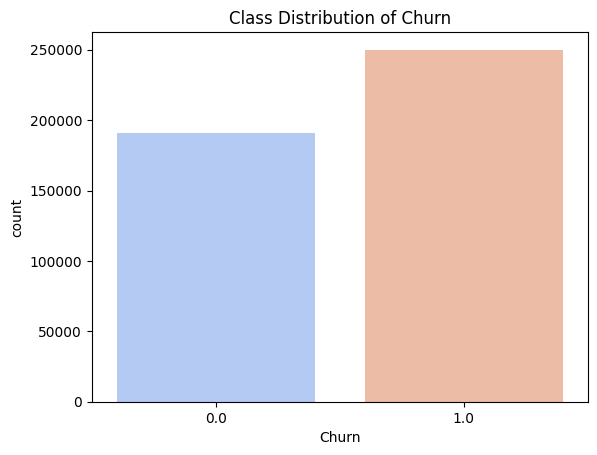

In [13]:
# Visualize class distribution
sns.countplot(data=data, x='Churn', palette='coolwarm')
plt.title('Class Distribution of Churn')
plt.show()

In the training dataset provided, the number of churned customers is larger than the un-churned customers. If this was a business's dataset, their current customers are not keeping their subscriptions.


To better understand the relationship between the variables I conduced correlation test.
When comparing the correlation between the numerical values, there is a positive correlation between churn and support calls, payment delays and age. There is a negative correlation between tenure, usage freuwncy and the total spent.
These insights show us that in this dataset a newer customer with less frequent support calls has a negative correlation to churning.

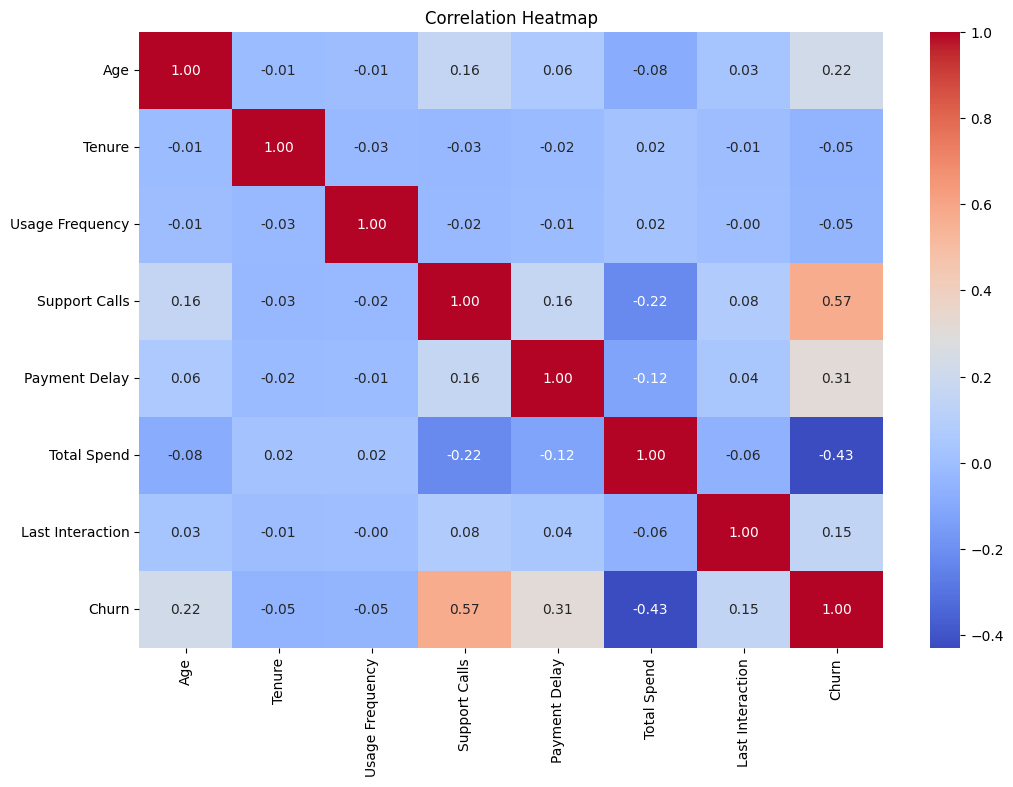

In [14]:
# Visualize correlations between numeric features
correlation_matrix = data.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Next, I compared the churn rate to the categorical variables like gender, subscription type and contract length. In this dataset there are more males than female customers. Of the female customer's, majority of them churn. Of the male customer's the churn and non-churn customer's are about even.

The standard, basic and premium subscriptions count had the same number of customers in each group. Of each subsription type, the number of customers churned was larger than the number that stayed.

Intrestingly, in the last figure it shows the length of contract types: Annual, Monthly and Quaterly. In these plots we see a difference amongst the groups. Of the annual contract types, there are larger groups of non-churn employees than any other contract length. The second highest non-churn population is for a quarterly contract. The least favorable outcome is for the monthly contract, which showed a 100% churn rate. This result may influence the models built later.

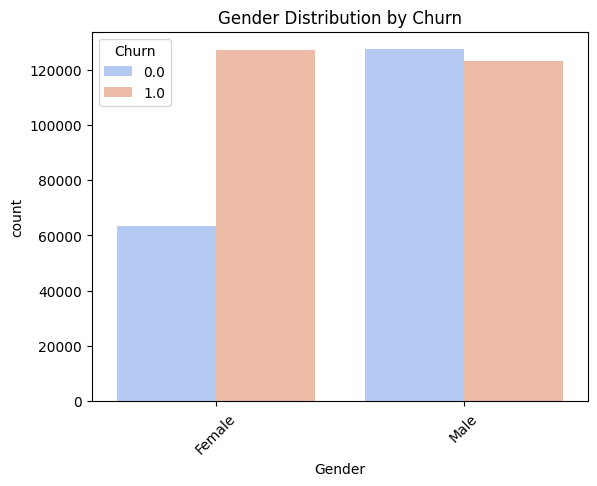

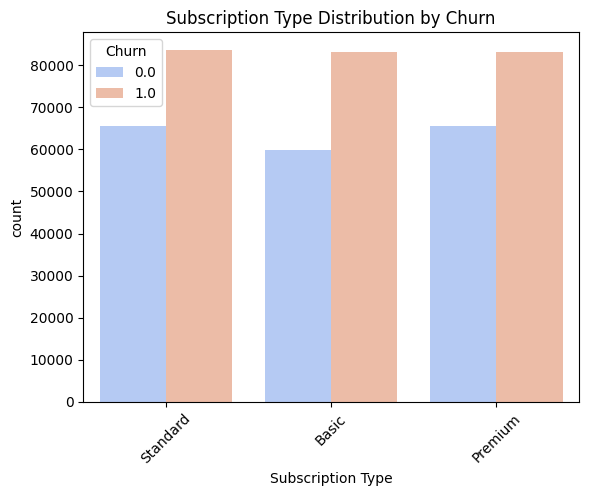

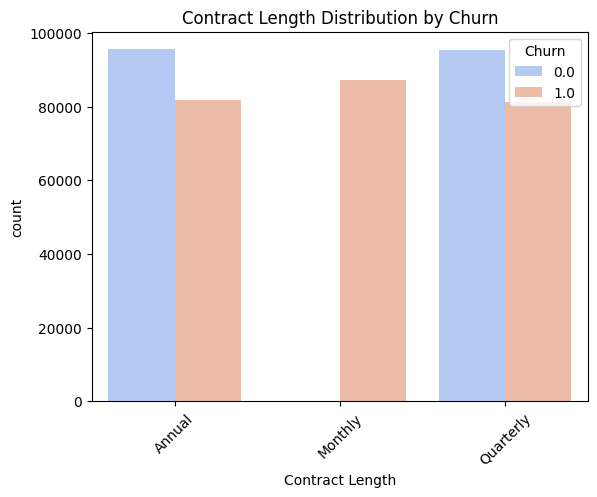

In [15]:
# Visualize categorical feature distributions
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure()
    sns.countplot(data=data, x=feature, hue='Churn', palette='coolwarm')
    plt.title(f'{feature} Distribution by Churn')
    plt.xticks(rotation=45)
    plt.show()

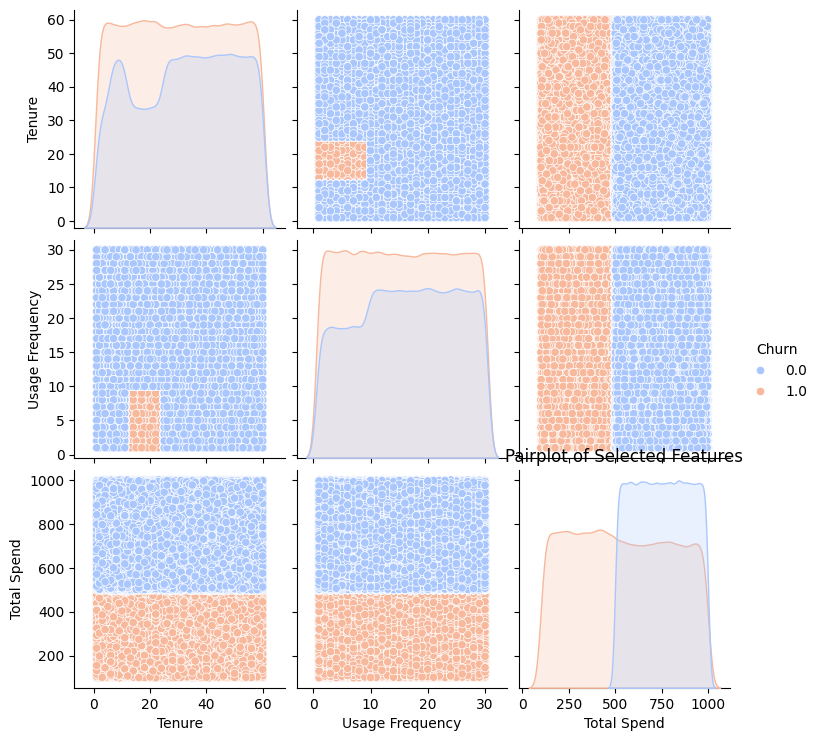


Churn Rate by Gender:
Gender
Female    0.666691
Male      0.491269
Name: Churn, dtype: float64

Churn Rate by Subscription Type:
Subscription Type
Basic       0.581782
Premium     0.559417
Standard    0.560700
Name: Churn, dtype: float64

Churn Rate by Contract Length:
Contract Length
Annual       0.460761
Monthly      1.000000
Quarterly    0.460256
Name: Churn, dtype: float64


In [16]:
# Analyze relationships using pairplot (subset of features for clarity)
subset_features = ['Tenure', 'Usage Frequency', 'Total Spend', 'Churn']
sns.pairplot(data[subset_features], hue='Churn', palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()

# Pivot table to summarize churn rates across categorical variables
for feature in categorical_features:
    churn_rate = data.groupby(feature)['Churn'].mean()
    print(f"\nChurn Rate by {feature}:")
    print(churn_rate)

Based on the plots above higher paying customers made up the nonchurn ppulation compared to the churned customers. The churn rate is higher for female customers and monthly subsribers. The most common churn subscriptions type is basic.

## Data Preparation

In [17]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [18]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [19]:
# Separate features and target variable
y = data['Churn']
X = data.drop('Churn', axis=1)

## Decision Tree


### Decision Tree 1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtree1 = DecisionTreeClassifier(random_state=0)
dtree1 = dtree1.fit(X_train, y_train)

In [21]:
# Predicting
y_pred = dtree1.predict(X_test)

# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)



Accuracy: 0.9998714555765595
Variance: 0.24541089798850055
SSE: 0.24539757991144964
Bias: -1.3318077050905597e-05


In [22]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

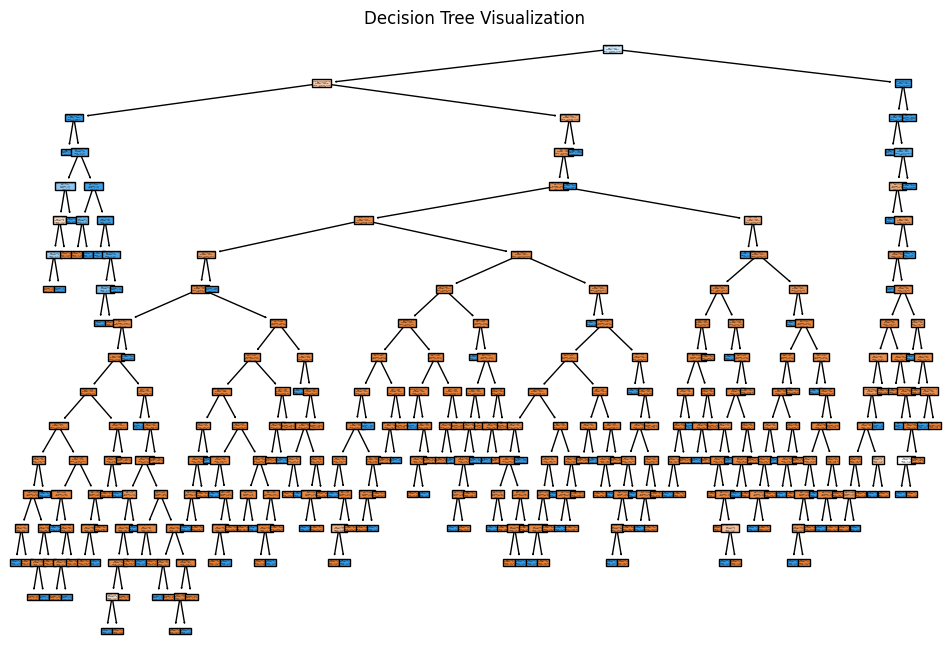

In [23]:
plt.figure(figsize=(12, 8))
plot_tree(dtree1, feature_names=X.columns, class_names=["Yes","No"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


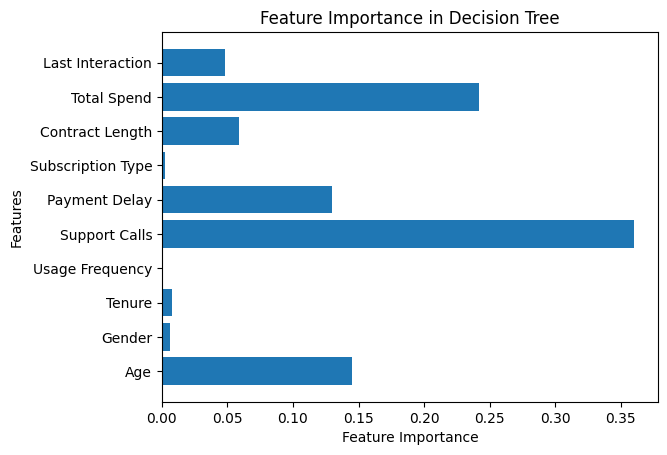

In [24]:
importances = dtree1.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

### Decision Tree 2

In [25]:
features = data.columns.tolist()
features.remove('Churn')
# Remove features that have lower importance to analyze affect on overall outcome
features.remove('Subscription Type')
features.remove('Usage Frequency')
features.remove('Tenure')
features.remove('Gender')

X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtree2 = DecisionTreeClassifier()
dtree2 = dtree2.fit(X_train, y_train)
# Predicting
y_pred = dtree2.predict(X_test)

In [26]:
# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.9751379962192817
Variance: 0.2448247071158265
SSE: 0.2454143663008637
Bias: 0.0005896591850372002


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     57153
         1.0       0.97      0.98      0.98     75097

    accuracy                           0.98    132250
   macro avg       0.98      0.97      0.97    132250
weighted avg       0.98      0.98      0.98    132250



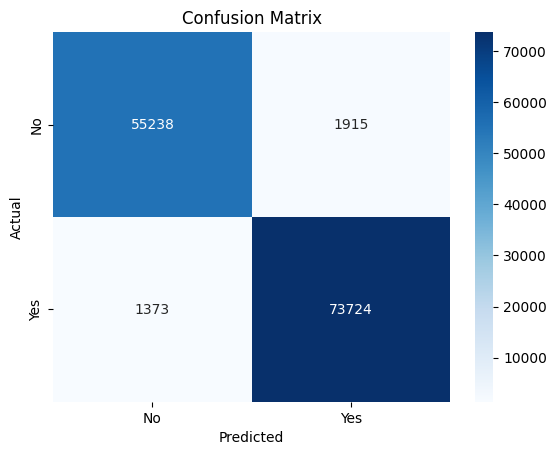

In [27]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree 3

In [28]:
features = data.columns.tolist()
features.remove('Churn')

X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Create and train a pruned Decision Tree with pre-pruning techniques
dtree3 = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=5, random_state=0)
dtree3.fit(X_train, y_train)

# Predict and evaluate
y_pred = dtree3.predict(X_test)
# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.9967939508506616
Variance: 0.24582229600380207
SSE: 0.2454078489999678
Bias: -0.00041444700383427846


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57153
         1.0       1.00      0.99      1.00     75097

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



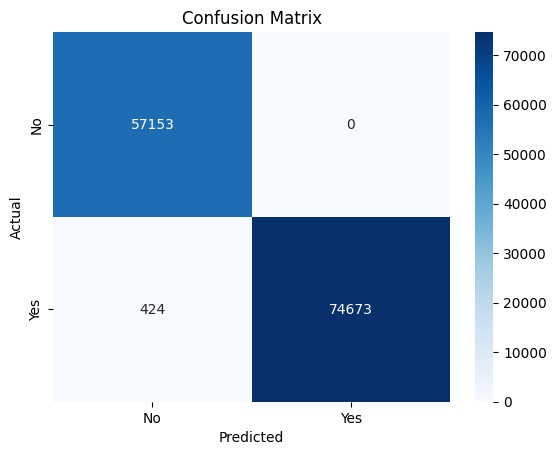

In [29]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree 4

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
features = data.columns.tolist()
features.remove('Churn')

X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Perform GridSearch to find the best parameters for the Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract the best model
best_clf = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Set Accuracy: 0.9998260869565218


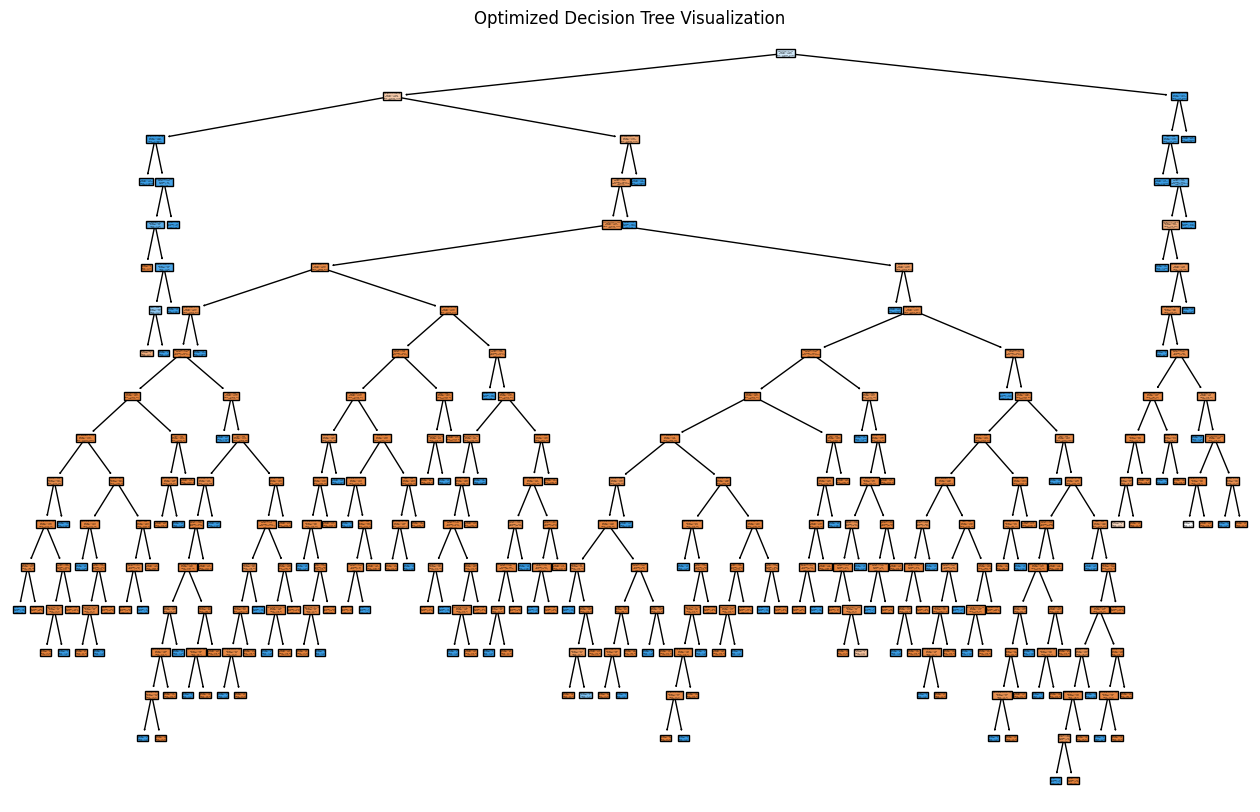

In [32]:
plt.figure(figsize=(16, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Optimized Decision Tree Visualization")
plt.show()

In [33]:
# Perform 5-fold cross-validation
scores = cross_val_score(best_clf, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print(f"Standard Deviation: {np.std(scores):.3f}")

Cross-Validation Scores: [0.99993195 0.99985255 0.99985255 0.99985255 0.99989792]
Mean Accuracy: 0.9998775042885015
Standard Deviation: 0.000


## Logistic Regression

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.8511

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     57153
         1.0       0.88      0.85      0.87     75097

    accuracy                           0.85    132250
   macro avg       0.85      0.85      0.85    132250
weighted avg       0.85      0.85      0.85    132250



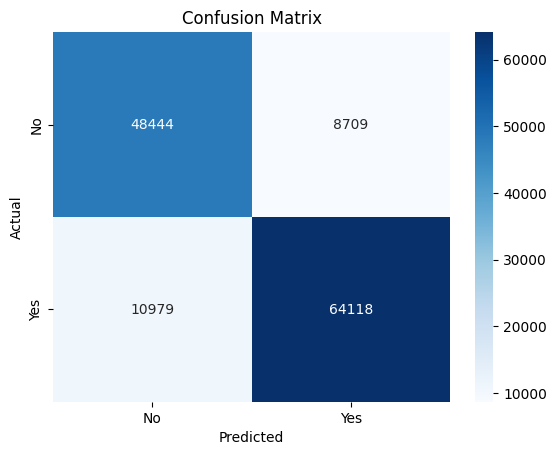

In [35]:
# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Neural Network

In [36]:
from sklearn.neural_network import MLPClassifier

### Neural Network 1

In [37]:
features = data.columns.tolist()
features.remove('Churn')

X = data[features]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9514 - loss: 0.1264 - val_accuracy: 0.9883 - val_loss: 0.0350
Epoch 2/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9909 - loss: 0.0304 - val_accuracy: 0.9926 - val_loss: 0.0252
Epoch 3/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9934 - loss: 0.0235 - val_accuracy: 0.9941 - val_loss: 0.0207
Epoch 4/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9945 - loss: 0.0202 - val_accuracy: 0.9949 - val_loss: 0.0190
Epoch 5/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9952 - loss: 0.0175 - val_accuracy: 0.9954 - val_loss: 0.0161
Epoch 6/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9956 - loss: 0.0158 - val_accuracy: 0.9966 - val_loss: 0.0128
Epoch 7/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.9956 - val_loss: 0.0141
Epoch 8/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9960 - loss: 0

The code above may show possible data leakagw and the 100% accuracy assures that the data is overfitting to the training set.


### Neural Network 2

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

### Neural Network vs Decision Tree

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Standardize the features
scaler = StandardScaler()

X = scaler.fit_transform(X)

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
}

# Perform cross-validation and evaluate each model
cv_results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.3f}")
    print(f"Standard Deviation: {scores.std():.3f}")

# Visualize Cross-Validation Results
plt.boxplot(cv_results.values(), labels=cv_results.keys(), patch_artist=True)
plt.title("Cross-Validation Score Distribution")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

## Essay Conclusion

In conclusion this project allowed me to gain various insights into the data and probable factors that could influence the customers choice to churn. Based on the data analysis above, I would present to business owners that their loyal demographic is primarily male and annual/quaterly subscribers. Additionally, factors like `Support Calls` and `Total Spend` led to a negative outcome for the customer retention.

Based on the machine learning models, the outputs showed favorable results given this specific trianing set. The Decision Tree allowed for a visual representation which would be simpler to explain to businesses and more interpretable. Additionally, the decision tree showed the importance of `Support Calls` and `Total Spend` has on the churn rate.

The best performing decision tree is `Decision tree 3 and 4`, although I would hesitate to use these data sets as the high accuracy could be due to overfitting. `Decision Tree 3` predicted that some customers would not churn, but they actually did. While not every model can predict 100% every outcome without overfitting, this is not a favorable model as we would prefer a model that predicts "Yes" to churn but the customer doesn't. I would select `Decision Tree 2` due to its high accuracy and its ability to predict a high number of churned customers.

The logistic regression model is a classic easy to understand binary classifier. While comparing to the other two algorithms it was the worst performing method. There may be ways to improve the accuracy and overall performance of the model with pruning of unimportant features. This model also predicted a high number of customers would not churn incorrectly. I decided to further analyze more complex models like the neural network.

The neural networks in general can interpret and predict data since it can learn the intricate patterns of a dataset. It is able to automatically identify optimal interactions between feautures while logistic regression requires a manual backward or forward elimination method (or some other algorithm to find the best parameters). Neural network can also handle a large amount of code. However, neural networks are less interpretable than a logistic or decision tree output. Additionally, the higher the complexity the more prone to overfitting the model can become.

In this project, the neural networks I built were able to achieve a 99% accuracy and a 100% accuracy. Again, this could be due to the model overfitting. To prevent overfitting I implemented an early stop to the algorthim to try and reduce the amount of computations the data made.

In a business scenario, I would utilize both the decision tree and neural network to provide predictions. To the business, I would prefer a model that is able to predict a churning customer. A model that innacuratley predicts a customer will churn and the opposite occurs will also be optimal because it still leads to a favorable outcome.